### now that our cnn model is trainined, we have to test it on new random data
### to see whether it is doing good or not.

In [1]:
from keras.models import load_model
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

Using TensorFlow backend.


### here we load our trained model

In [2]:
model = load_model("updated_data-try7-weights-improvement-87-0.96.hdf5")

In [3]:
#define a function to get log-melspectrograms of audio files
def log_mel_spec(file):
    y,sr = librosa.load(file)
    
    five_sec = 5 * sr
    diff = abs(len(y) - five_sec)
    #if len >5 sec then slice wave
    if(len(y) > five_sec):
        st_slice = np.random.randint(diff)
        end_slice = len(y) - (diff - st_slice)
        y = y[st_slice:end_slice]
        
    #if len<5 sec then pad wave
    elif(len(y) < five_sec):
        st_pad = np.random.randint(diff)
        end_pad = diff - st_pad
        y = np.pad(y, (st_pad,end_pad), "constant")

    mel = librosa.feature.melspectrogram(y = y)
    #log_mel = librosa.amplitude_to_db(mel)
    log_mel = librosa.power_to_db(mel)
    return log_mel

### here we extracted out the log-mel-specs from the audio clip to be tested
### and then we made predctions whether the audio clip is good/bad/average.

In [4]:
def evaluate(file):
    logmel = log_mel_spec(file)
    plt.imshow(logmel, aspect='auto', origin='lower')
    res_vec = model.predict(logmel.reshape(1,128,216,1))
    max_loc = np.argmax(res_vec)
    if(max_loc == 0):
        return 'average'
    elif(max_loc == 1):
        return 'bad'
    else:
        return 'good'

### randomly we selected a new clip
### and our model classified it as expected

'average'

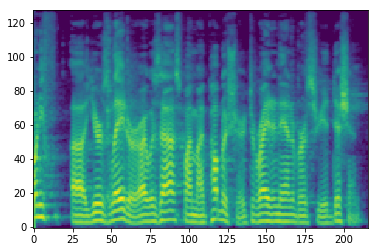

In [101]:
evaluate("H:/not_confirmed/saijal-set4-clip11_2,2,2.wav")

In [144]:
ipd.Audio("H:/3class_data/good/rahul-clip108_3,3,2.5.wav")

### again we tried it on new clip
### and it gave exact result

'bad'

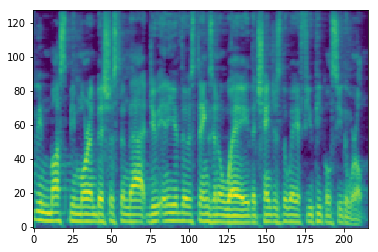

In [69]:
evaluate("H:/3class_data/bad/rahul-clip94_1,1,1.wav")

### on more predction we made with good clip
### and it classified it as 'good'.

'good'

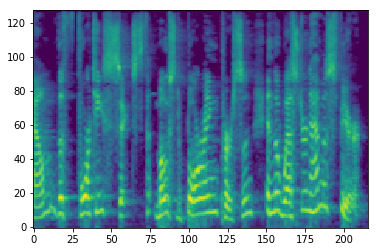

In [70]:
evaluate("H:/3class_data/good/rahul-brian-clip1_3,3,3.wav")

In [145]:
ipd.Audio("H:/3class_data/good/rahul-brian-clip1_3,3,3.wav")

'average'

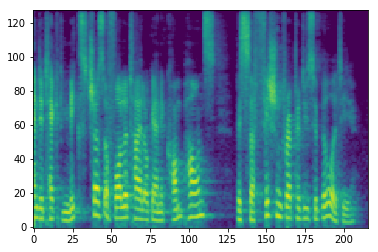

In [76]:
evaluate("H:/breath_ted/clip6.wav")

'good'

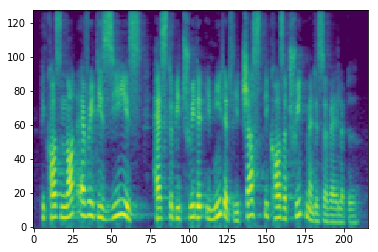

In [78]:
evaluate("H:/breath_ted/clip7.wav")